# Continuing ML-II

in regression model we bulit
bias--trai score--94% test score 98%--best fit model
bias--94% varience-30%--high bias low varience--underfit model
bias-30% variance-90%--low bias high varinve--overfit model

overfitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

In [3]:
dataset=pd.read_csv(r"C:\Users\umari\OneDrive\Desktop\FSDS DATASETs\Salary_Data.csv")

In [4]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()


In [5]:
from sklearn.model_selection import train_test_split


In [6]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred=regressor.predict(x_test)


In [10]:
bias=regressor.score(x_train,y_train)
print(bias)

0.9411949620562126


In [11]:
variance=regressor.score(x_test,y_test)
print(variance)

0.988169515729126


In [12]:
dataset.mean()
dataset['Salary'].mean()

76003.0

In [13]:
dataset.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [14]:
dataset['Salary'].mode()

0      37731
1      39343
2      39891
3      43525
4      46205
5      54445
6      55794
7      56642
8      56957
9      57081
10     57189
11     60150
12     61111
13     63218
14     64445
15     66029
16     67938
17     81363
18     83088
19     91738
20     93940
21     98273
22    101302
23    105582
24    109431
25    112635
26    113812
27    116969
28    121872
29    122391
Name: Salary, dtype: int64

In [15]:
dataset.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [16]:
dataset['Salary'].var()

751550960.4137931

#Introducing Scipy

In [17]:
from scipy.stats import variation
variation(dataset.values)

array([0.5251297 , 0.35463929])

# Correlation

In [18]:
dataset.corr() #correlation matrix

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [19]:
dataset['Salary'].corr(dataset['YearsExperience']) #correlation between two columns

0.9782416184887598

# Skewness

In [20]:
dataset.skew() #this will give skewness of all columns

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [21]:
dataset['Salary'].skew() #skewness of particular column

0.35411967922959153

# Standard Error

In [22]:
dataset.sem() #standard error of mean for all columns

YearsExperience       0.518125
Salary             5005.167198
dtype: float64

In [23]:
# for calculating Z-score we have to import a library first
import scipy.stats as stats
dataset.apply(stats.zscore) #z-score for all columns

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [24]:
stats.zscore(dataset['Salary']) #z-score for particular column

0    -1.360113
1    -1.105527
2    -1.419919
3    -1.204957
4    -1.339781
5    -0.718307
6    -0.588158
7    -0.799817
8    -0.428810
9    -0.698013
10   -0.474333
11   -0.749769
12   -0.706620
13   -0.702020
14   -0.552504
15   -0.299217
16   -0.370043
17    0.262859
18    0.198860
19    0.665476
20    0.583780
21    0.826233
22    0.938611
23    1.402741
24    1.240203
25    1.097402
26    1.519868
27    1.359074
28    1.721028
29    1.701773
Name: Salary, dtype: float64

In [25]:
#sum of squer regresso(SSR)
y_mean=np.mean(y)
SSR=np.sum((y_pred-y_mean)**2)
print(SSR)

6263152884.284127


In [26]:
# Sum of Squared Errors (SSE)
SSE=np.sum((y_test-y_pred)**2)
print(SSE)

76940473.78875937


In [27]:
# Sum of Squared Total (SST)
mean_total=np.mean(dataset.values) #mean of all values in dataset
SST=np.sum((y_test-mean_total)**2)
print(SST)

19458118220.753937


In [28]:
# R2 Squer
r_squer=1-(SSR/SST)
r_squer

0.6781213469242942

In [29]:
train_mse=mean_squared_error(y_train,regressor.predict(x_train))
test_mse=mean_squared_error(y_test,y_pred)

In [30]:
print(train_mse)
print(test_mse)

36149670.11816131
12823412.298126562


# Save the trained model to disk

In [31]:
import pickle
filename='linear_regression_model.pkl'


In [32]:
#Compare predicted and actual salaries from the test set
comparison = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
print(comparison)

    Actual      Predicted
2    37731   40748.961841
28  122391  122699.622956
13   57081   64961.657170
10   63218   63099.142145
26  116969  115249.562855
24  109431  107799.502753


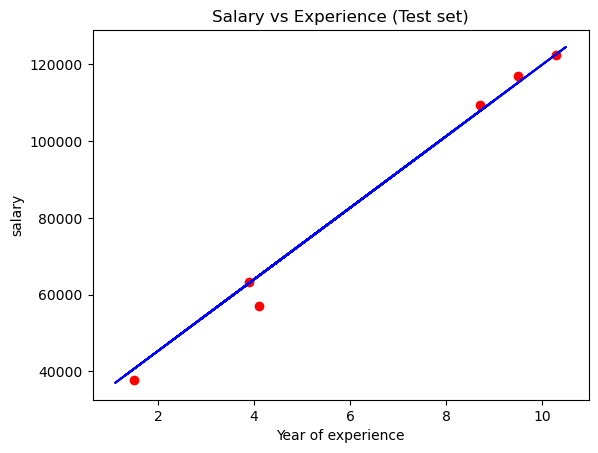

In [33]:
#visulization the Test set result
plt.scatter(x_test, y_test, color = 'red') #real salary data
plt.plot(x_train, regressor.predict(x_train),color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Year of experience')
plt.ylabel('salary')
plt.show()

In [34]:
m = regressor.coef_
print(m)

[9312.57512673]


In [35]:
c = regressor.intercept_
print(c)

26780.099150628186


In [36]:
y_12 = m*12+c
print(y_12)

[138531.00067138]


In [37]:
y_10 = m*10+c
print(y_10)

[119905.85041792]


In [38]:
# Best fit line here
coef = print(f"Coefficent : {regressor.coef_}")
intercept = print(f"Intercept : {regressor.intercept_}")

Coefficent : [9312.57512673]
Intercept : 26780.099150628186


In [39]:
#ftuer predicttion code
exp_12_future_pred = 9312 * 100 +26780
exp_12_future_pred

957980

In [40]:
bias = regressor.score(x_train,y_train)
print(bias)

0.9411949620562126


In [41]:
variance = regressor.score(x_test,y_test)
print(variance)

0.988169515729126


In [42]:
dataset.mean() # This will give mean of entire dataframe
dataset['Salary'].mean() #This will give us the mean of that particular column
dataset.median() # This will give median of entire dataframe
dataset['Salary'].median() # This will give us median of that particular column
dataset['Salary'].mode() # This will give us mode of that particular column
dataset.var() # This will give variance of entire dataframe

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [43]:
#Standard Deviation
dataset.std() # This will give you the standard deviation of the entire dataframe

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [44]:
# Coefficent of Variation
# for calculating cv we have to import a library first
from scipy.stats import variation
variation(dataset.values) # This will give cv of entire dataframe

array([0.5251297 , 0.35463929])

In [45]:
# Correlation
dataset.corr() # This will give correlation of entire dataframe
# This will give us the correlation between these two attributes
dataset['Salary'].corr(dataset['YearsExperience'])

0.9782416184887598

In [46]:
#Skewness
dataset.skew() # This will give the skewness of entire dataframe
dataset['Salary'].skew() # This will give us skewness of that particular column

0.35411967922959153

In [47]:
#Standard Error
dataset.sem() # This well give standard error os entire dataframe
dataset['Salary'].sem() # This will give us standard error of that particular column

5005.167198052405

In [48]:
# Z Score
# For calculating Z- Score we have to import a library first
import scipy.stats as stats
dataset.apply(stats.zscore) # This will give Z-Score of Entire Dataframe
stats.zscore(dataset['Salary']) # This will give us the Z Score of that particularВ column

0    -1.360113
1    -1.105527
2    -1.419919
3    -1.204957
4    -1.339781
5    -0.718307
6    -0.588158
7    -0.799817
8    -0.428810
9    -0.698013
10   -0.474333
11   -0.749769
12   -0.706620
13   -0.702020
14   -0.552504
15   -0.299217
16   -0.370043
17    0.262859
18    0.198860
19    0.665476
20    0.583780
21    0.826233
22    0.938611
23    1.402741
24    1.240203
25    1.097402
26    1.519868
27    1.359074
28    1.721028
29    1.701773
Name: Salary, dtype: float64

In [49]:
#Skewness
dataset.skew() # This will give the skewness of entire dataframe
dataset['Salary'].skew() # This will give us skewness of that particular column


0.35411967922959153

In [50]:
#Standard Error
dataset.sem() # This well give standard error os entire dataframe
dataset['Salary'].sem() # This will give us standard error of that particular column

5005.167198052405

In [51]:
# Sum of Sqaure Regressor (SSR)
y_mean = np.mean(y)
SSR = np.sum((y_pred-y_mean)**2)
print(SSR)

6263152884.284127


In [52]:
#SSE
y = y[0:6]
SSE = np.sum((y-y_pred)**2)
print(SSE)

15274062883.9432


In [53]:
#SST
mean_total = np.mean(dataset.values)
SST = np.sum((dataset.values-mean_total)**2)
print(SST)
print(SSR)
print(SSE)
print(SST)

108429703765.82735
6263152884.284127
15274062883.9432
108429703765.82735


In [54]:
#R2 Square
r_square = 1 - (SSR/SST)
r_square
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, regressor.predict(x_train))
test_mse = mean_squared_error(y_test, y_pred)
print(train_mse)
print(test_mse)

36149670.11816131
12823412.298126562


In [55]:
#pickle is the frontend . use to frontend devl.
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle

# Load dataset
data = pd.read_csv(r"C:\Users\umari\OneDrive\Desktop\FSDS DATASETs\Salary_Data.csv")

# Split into X and y
X = data[['YearsExperience']]
y = data['Salary']

# Train linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Save trained model
with open(r"C:\Users\umari\OneDrive\Desktop\FSDS DATASETs\linear_regression_model.pkl", 'wb') as file:
    pickle.dump(regressor, file)

print("✅ Model trained and saved as linear_regression_model.pkl")

✅ Model trained and saved as linear_regression_model.pkl


In [56]:
#save file
import os
print(os.getcwd())

c:\Users\umari\OneDrive\Desktop\Data Science And Ai
